In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import seaborn as sns
import pandas as pd
import time
from IPython.display import clear_output
import os
import random
import time
from matplotlib import rcParams
rcParams['figure.figsize'] = 11.7,4
sns.set_theme()

### Datos
Simulación de datos No lineales con 
$\mathbf{x}\in \mathbb{R}^{n}$ y $\mathbf{y}\in \mathbb{R}^{n}$.

$$\mathbf{x}=
\begin{pmatrix}
x_1\\ 
x_2\\ 
x_3\\ 
\vdots \\ 
x_n\\ 
\end{pmatrix} \mathbf{y}=
\begin{pmatrix}
y_1\\ 
y_2\\ 
y_3\\ 
\vdots \\ 
y_n\\ 
\end{pmatrix}$$

Modelo matemático $y_i=e^{x_i^2+3x_i+2}$

In [8]:
#Simulación con ruido gausiano
n = 200
x = np.linspace (0,1, n)                                            # Genera datos que contienen ruido
a1, b1, c1 = 1,3,2                                                  # Este es el parámetro real de la función y (x) que debe ajustarse
y = [np.exp(a1*i**2+b1*i+c1)+random.gauss(0,4) for i in x]
df=pd.DataFrame({'x': x, 'y': y})

Text(5.334999999999994, 0.5, 'salidas')

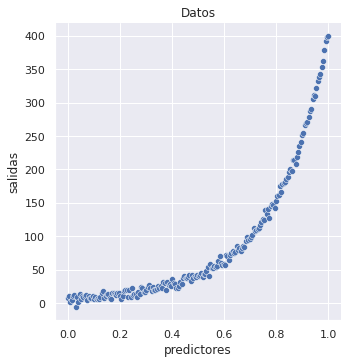

In [9]:
sns.relplot(x='x', y='y', data=df)
plt.title('Datos')
plt.xlabel('predictores')
plt.ylabel('salidas')

Ahora bien, si asumimos el error como un error cuadrático medio, entonces el error de esa i-ésima observación se puede expresar como:
$$l_i=\frac{1}{2}(\hat{y_i}-y_i)^{2}$$

En consecuencia, el error total ($L$) asociado al modelo viene siendo la contribución del error de cada una de las observaciones. Es decir:
$$L=\frac{1}{n}\sum_{i=1}^{n}l_i$$
$$L=\frac{1}{2n}\sum_{i=1}^{n}(\hat{y_i}-y_i)^{2}$$

Esta ecuación es conocida como la función de pérdida.

De hecho, en este caso se puede asumir un modelo NO lineal del tipo $\hat{y}=wx^2+b$. Por lo tanto, la pérdida para cada observación estaría dada por la siguiente expresión:

$$L=\frac{1}{2n}\sum_{i=1}^{n}(wx_i^2+b-y_i)^{2}$$

Los valores $x_i$ y $y_i$ son los conjuntos de observaciones y valores reales, $b$ y $w$ los parámetros del modelo NO lineal los cuales se puden obtener a través del descenso del gradiente.

In [10]:
def resultados(w,L, dL, ws, Ls):
  ws=np.append(ws,w)
  Ls=np.append(Ls,L)
  
  print('pendiente w=', w)
  print('Pérdida L=', L)
  print('Derivada dL/dw=', dL)

  plt.figure(figsize=(15,4))
  plt.subplot(1,2,1)
  plt.plot(x, y,'ob', label="y reales")
  plt.title('Datos')
  plt.xlabel('x')
  plt.ylabel('salidas (ys)')
  tx=np.linspace(0,1,100)
  plt.plot(tx, w*tx**2, 'g', label="y predicha")
  plt.legend()

  plt.subplot(1,2,2)
  plt.plot(ws,Ls, '.b')
  plt.plot(w,L, '*r')
  plt.xlim((20, 380))
  plt.title('Función de pérdida')
  plt.xlabel('peso w')
  plt.ylabel('valor de FP')

  plt.show()

  return ws, Ls

pendiente w= 273.14323968334446
Pérdida L= 21090547.17685082
Derivada dL/dw= -4.526308542278912


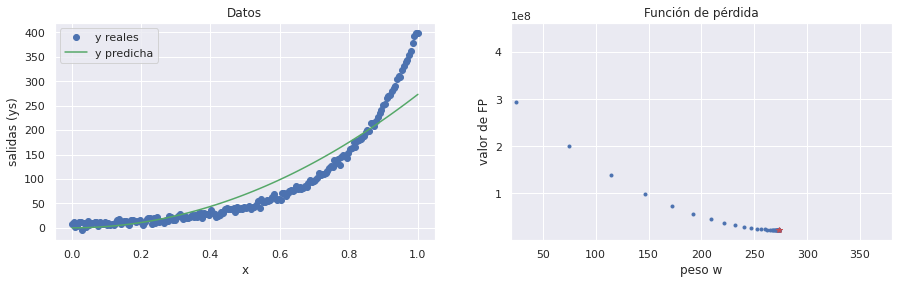

La implementación llegó a la iteración  63


In [11]:
ws=[]
Ls=[]

#Selección aleatoria
w=np.random.randint(70,100)*(np.random.randint(2,4)-2.5)

#Bucle simulando las iteraciones
for i in range(200):

  #Calculo de la función de pérdida y su derivada del modelo NO lineal
  L=(1/2*len(x))*np.dot(np.transpose(w*(x**2)-y),w*(x**2)-y)
  dL=(1/2*len(x))*(np.dot(2*np.transpose(x),w*(x**2)-y)+np.dot(np.transpose(w*(x**2)-y),2*x))

  #Tasa de aprendizaje
  eta=0.00001

  #Graficas (resultados)
  ws, Ls=resultados(w,L, dL, ws, Ls)

  #Cálculo del nuevo w
  w=w-eta*dL

  if np.abs(dL)<5:
    print('La implementación llegó a la iteración ', i)
    break

  time.sleep(0.1)
  clear_output(wait=True)